# Investigating Coral Bleaching

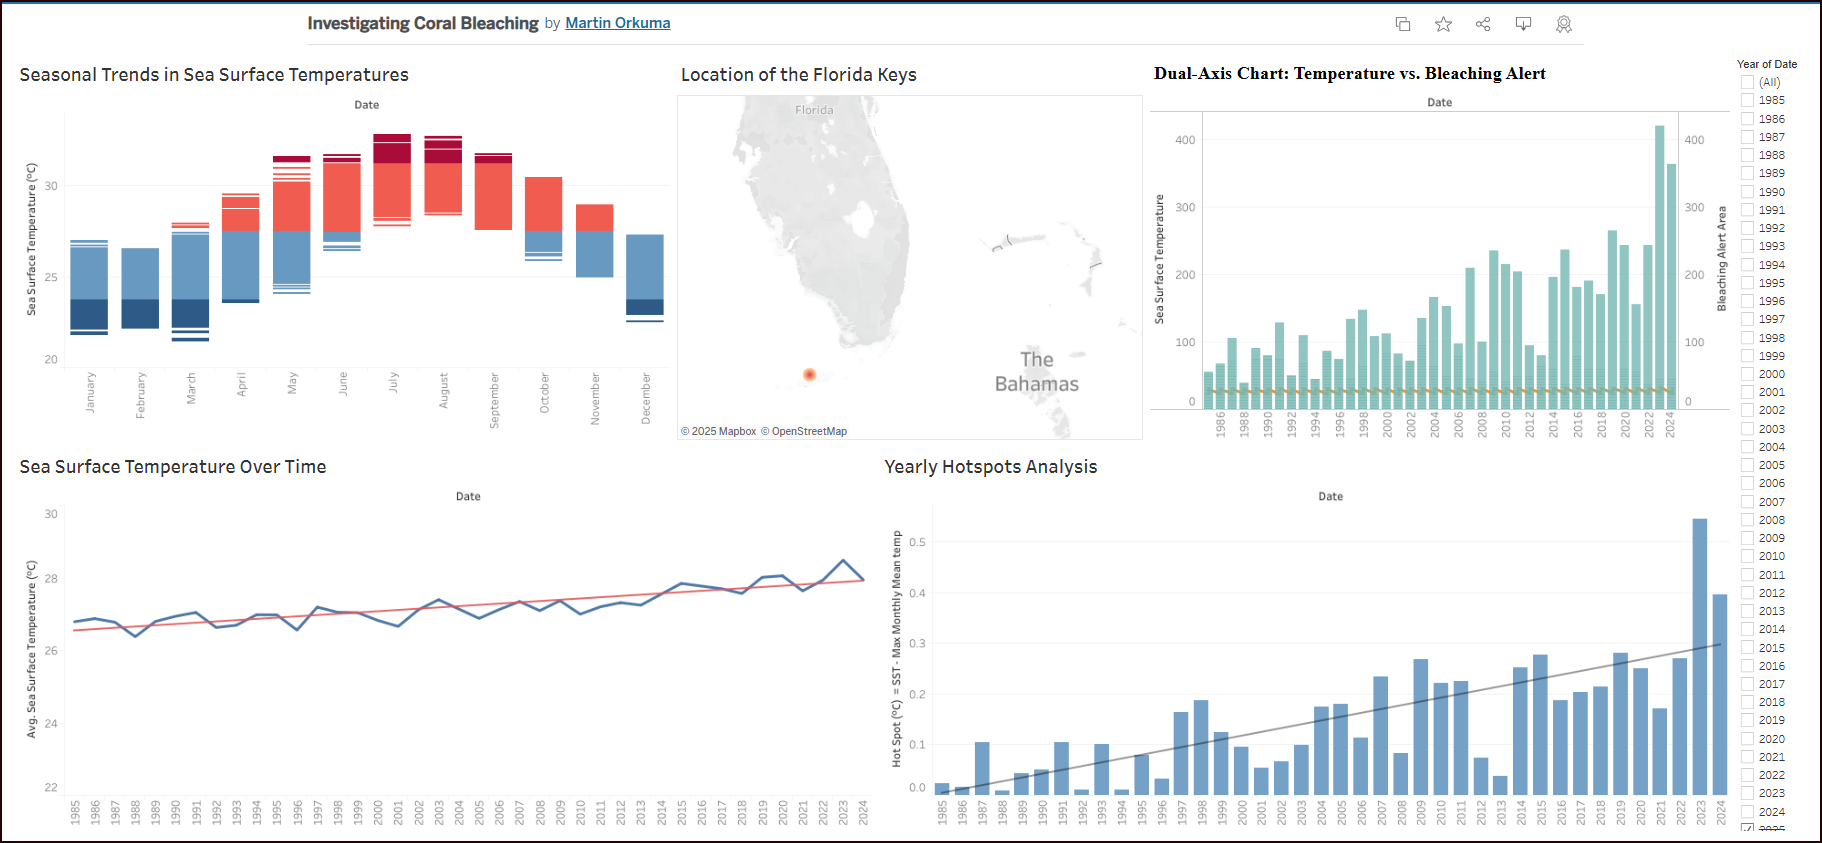

## Introduction

Coral bleaching is a significant environmental issue affecting marine ecosystems worldwide, particularly in regions like the Florida Keys. This phenomenon occurs when corals experience prolonged stress due to elevated sea surface temperatures, leading to the expulsion of their symbiotic algae, which provide essential nutrients and coloration. As ocean temperatures continue to rise due to climate change, the frequency and severity of coral bleaching events are increasing, posing a major threat to reef biodiversity and ecosystem health.

**Objective:**

The objective of this analysis is to examine the relationship between sea surface temperature (SST) and coral bleaching in the Florida Keys. Using historical data, from 1985 to 2025, this analysis identifies trends in SST over time, analyzes geospatial variations, and determines the correlation between SST, hotspots, and bleaching alert areas. This analysis aims to provide insights into how increasing ocean temperatures contribute to coral stress, helping inform conservation efforts and climate adaptation strategies.

**Data Source:**

The dataset used in this project was compiled by the [National Oceanic and Atmospheric Administration](https://www.noaa.gov/) from 1985 to 2025. [Click to download the dataset.](https://www.nnvl.noaa.gov/Portal/Output/NOAA_CRW_5km_Regional_Virtual_Stations/Florida_Keys.csv)

**Key Terms:**

Definitions of key terms can be found [here.](https://coralreefwatch.noaa.gov/product/5km/methodology.php#ssttrend)

### Key Analyses & Visualizations:

1. Data Processing and Cleaning

2. Time Series Analysis of Sea Surface Temperature

- Plot SST trends over the years to identify long-term warming patterns.
- Compare SST trends with bleaching alert areas.

3. Heatmap of SST & HotSpots

- Create a geospatial heatmap of SST and hotspots to identify high-risk areas.
- Identify seasonal variations in SST and bleaching.

4. Correlation Analysis

- Assess the correlation between SST, hotspots, and bleaching alert areas.
- Use scatter plots and regression analysis to examine relationships.

5. Seasonal Trends in Coral Bleaching

- Boxplots of SST and hotspots by month to understand seasonal patterns.
- Identify peak bleaching seasons.

6. Impact of Degree Heating Weeks (DHW) on Coral Bleaching

- Visualize how DHW relates to bleaching alerts.
- Identify threshold DHW values leading to mass bleaching events.

7. Impact of Higher Temperatures on Coral Bleaching
- Visualize how SST relates to bleaching alerts.

## Import Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from datetime import datetime

## Load the Dataset

In [9]:
# Load the dataset
df = pd.read_csv("Florida_Keys.csv")

# Display basic information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14654 entries, 0 to 14653
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     14654 non-null  object 
 1   Latitude                 14654 non-null  float64
 2   Longitude                14654 non-null  float64
 3   Sea_Surface_Temperature  14654 non-null  float64
 4   HotSpots                 14654 non-null  float64
 5   Degree_Heating_Weeks     14654 non-null  float64
 6   Bleaching_Alert_Area     14654 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 801.5+ KB


In [10]:
print("\nColumn Information:")
df.head().T


Column Information:


,0,1,2,3,4
Date,01/01/1985,01/02/1985,01/03/1985,01/04/1985,01/05/1985
Latitude,24.75,24.75,24.75,24.75,24.75
Longitude,-81.625,-81.625,-81.625,-81.625,-81.625
Sea_Surface_Temperature,24.96,24.95,24.98,24.63,24.35
HotSpots,0.0,0.0,0.0,0.0,0.0
Degree_Heating_Weeks,0.0,0.0,0.0,0.0,0.0
Bleaching_Alert_Area,0,0,0,0,0


### Data Cleaning

In [12]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

# Extract Month for seasonal analysis
df['Month'] = df['Date'].dt.month

## Data Analysis and Visualization

### Time Series Analysis of Sea Surface Temperature

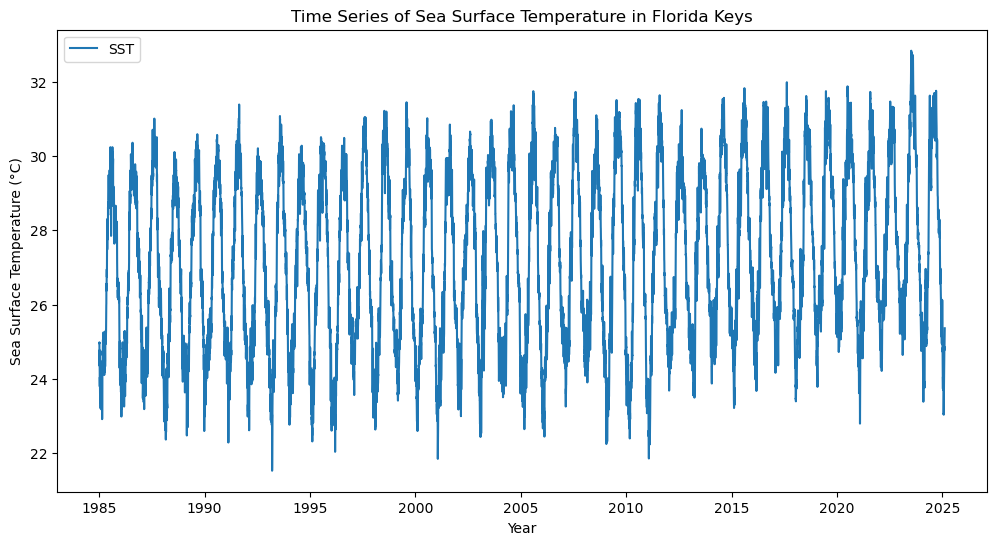

In [15]:
# Calculate the Time Series Analysis of Sea Surface Temperature
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Sea_Surface_Temperature", label="SST")
plt.xlabel("Year")
plt.ylabel("Sea Surface Temperature (°C)")
plt.title("Time Series of Sea Surface Temperature in Florida Keys")
plt.legend()
plt.show()

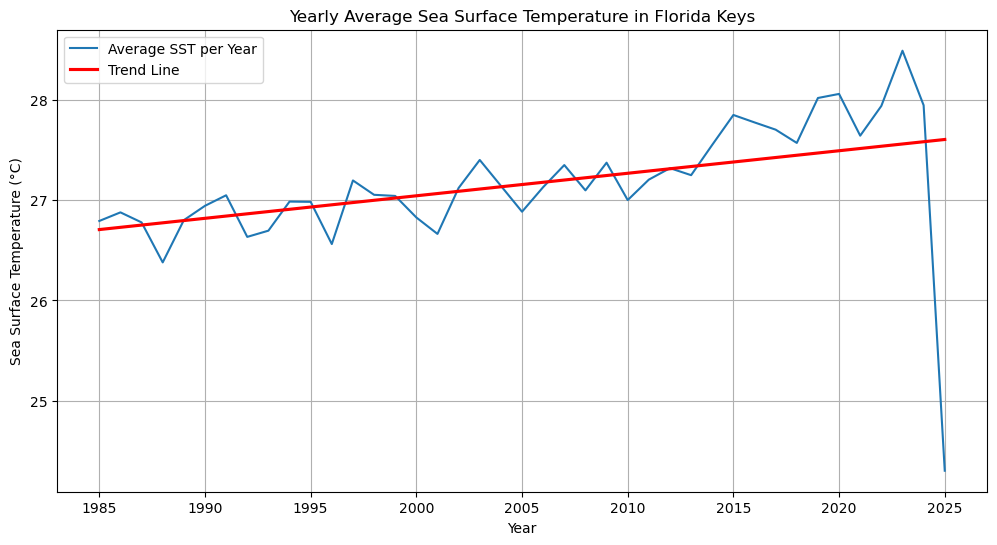

In [47]:
# Extract the year and calculate the yearly average SST
df_yearly = df.groupby(df["Date"].dt.year)["Sea_Surface_Temperature"].mean().reset_index()

# Rename columns for clarity
df_yearly.rename(columns={"Date": "Year"}, inplace=True)

# Plot the yearly average sea surface temperature
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, x="Year", y="Sea_Surface_Temperature", label="Average SST per Year")

# Add a trend line using Seaborn’s regplot (Linear Regression)
sns.regplot(data=df_yearly, x="Year", y="Sea_Surface_Temperature", scatter=False, ci=None, color="red", label="Trend Line")

plt.xlabel("Year")
plt.ylabel("Sea Surface Temperature (°C)")
plt.title("Yearly Average Sea Surface Temperature in Florida Keys")
plt.legend()
plt.grid(True)  # Optional for better readability
plt.show()

### Heatmap of SST & HotSpots (Geospatial)

The location indicated represents the Florida Keys at 24.75° N, 81.63° W. 

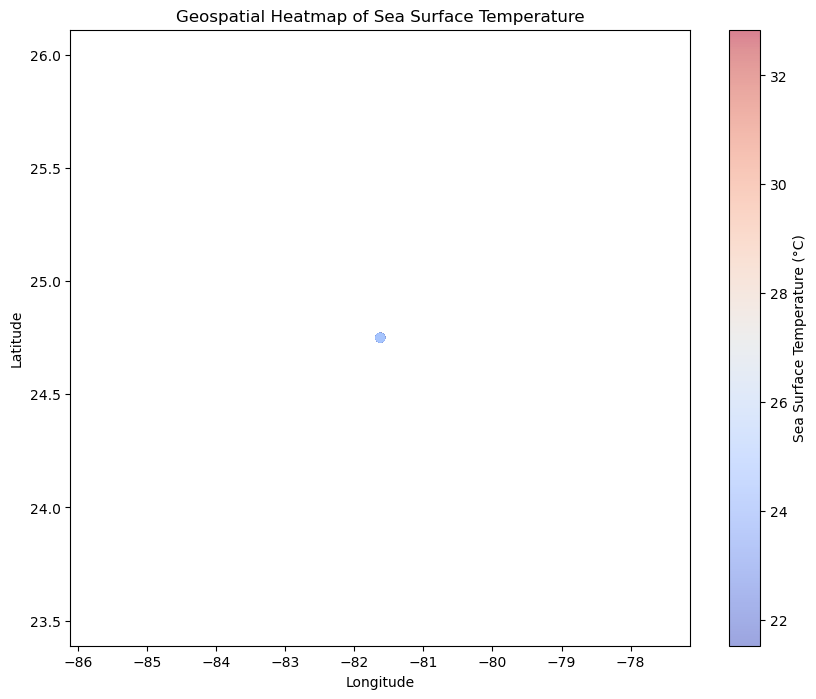

In [18]:
# Heatmap of SST & HotSpots (Geospatial)
plt.figure(figsize=(10, 8))
sc = plt.scatter(df['Longitude'], df['Latitude'], c=df['Sea_Surface_Temperature'], 
                 cmap='coolwarm', alpha=0.5)
plt.colorbar(sc, label="Sea Surface Temperature (°C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Heatmap of Sea Surface Temperature")
plt.show()

### Correlation Analysis

This analysis generates a correlation heatmap.

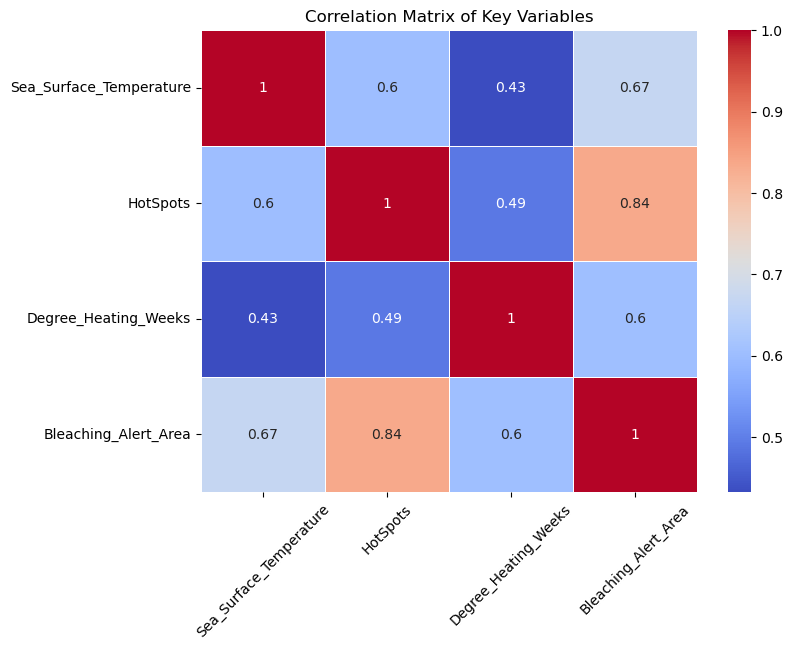

In [20]:
# Correlation Analysis
corr_matrix = df[['Sea_Surface_Temperature', 'HotSpots', 
                  'Degree_Heating_Weeks', 'Bleaching_Alert_Area']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Key Variables")

# Slant the x-axis labels
plt.xticks(rotation=45)

plt.show()

### Seasonal Trends in Sea Surface Temperature

The chart shows monthly variations in temperature across the year. 
Each month is represented by a number, with 1 = January and 12 = December.

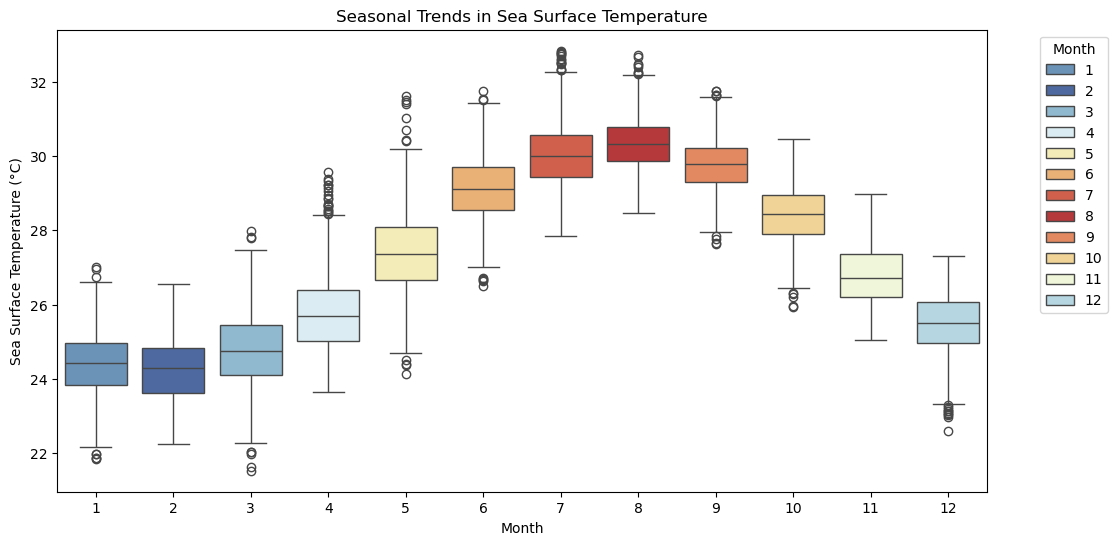

In [22]:
# Compute the average temperature per month to define color mapping
avg_temps = df.groupby("Month")["Sea_Surface_Temperature"].mean().sort_values()

# Create a color palette where warmer months get warmer colors
warm_palette = sns.color_palette("RdYlBu_r", len(avg_temps))  # Reversed to match warm-to-cool

# Map months to their corresponding colors based on average temperature
month_colors = {month: color for month, color in zip(avg_temps.index, warm_palette)}

plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df, 
    x='Month', 
    y='Sea_Surface_Temperature', 
    hue='Month', 
    palette=month_colors  # Use our custom mapping
)

plt.xlabel("Month")
plt.ylabel("Sea Surface Temperature (°C)")
plt.title("Seasonal Trends in Sea Surface Temperature")

plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

plt.show()

### Impact of Degree Heating Weeks (DHW) on Coral Bleaching

This scatterplot shows the relationship between degree heating weeks (DHW) and coral bleaching.

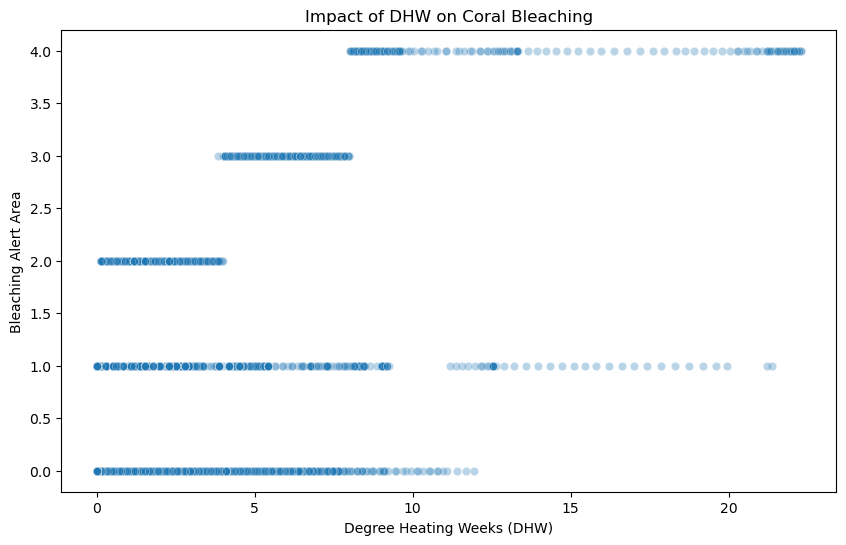

In [24]:
# Impact of Degree Heating Weeks (DHW) on Coral Bleaching ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Degree_Heating_Weeks", y="Bleaching_Alert_Area", alpha=0.3)
plt.xlabel("Degree Heating Weeks (DHW)")
plt.ylabel("Bleaching Alert Area")
plt.title("Impact of DHW on Coral Bleaching")
plt.show()

## Impact of Higher Temperature on Corals

Analyzing the impact of higher sea surface temperatures on coral bleaching.

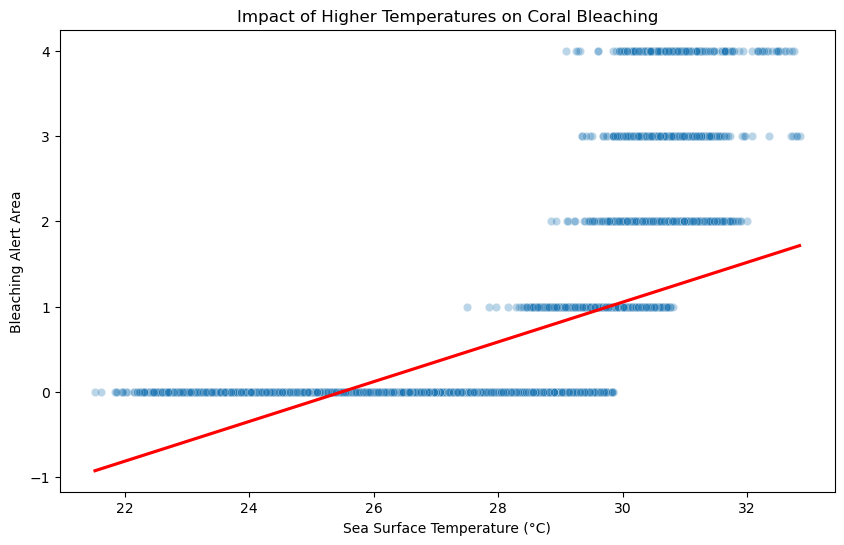

In [26]:
# Visualization: Impact of Higher Temperatures on Coral Bleaching ---

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Sea_Surface_Temperature", y="Bleaching_Alert_Area", alpha=0.3)
sns.regplot(data=df, x="Sea_Surface_Temperature", y="Bleaching_Alert_Area", scatter=False, color='red', ci=None)  # Trend line

plt.xlabel("Sea Surface Temperature (°C)")
plt.ylabel("Bleaching Alert Area")
plt.title("Impact of Higher Temperatures on Coral Bleaching")
plt.show()

## Summary and Key Insights

**Rising Sea Surface Temperature (SST) Trends**

- The time series analysis shows a clear upward trend in SST over the years, indicating long-term warming in the Florida Keys.
- Seasonal fluctuations are evident, with higher SST values typically observed during the summer months.

**Geospatial Hotspots for High Temperatures**

- The heatmap visualization highlights specific geographic areas experiencing consistently higher SST levels, correlating with increased coral stress.
- These high-temperature zones are more prone to experiencing frequent bleaching events.

**Strong Correlation Between SST and Coral Bleaching**

- A significant positive correlation exists between SST, hotspots, and bleaching alert areas, confirming that higher temperatures contribute to increased bleaching incidents.
- The regression analysis indicates that as SST exceeds a critical threshold, bleaching alert levels rise sharply.

**Seasonal Patterns of Bleaching Events**

- Boxplot analysis reveals that bleaching alerts peak during warmer months, typically in late summer when SST reaches its highest levels.
- This aligns with known coral bleaching patterns, reinforcing the impact of temperature stress.

**Degree Heating Weeks (DHW) as a Key Predictor**

- The analysis of DHW shows that prolonged exposure to elevated temperatures plays a crucial role in triggering mass bleaching events.
- Higher DHW values are closely linked to more severe bleaching alerts, suggesting that accumulated heat stress is a primary driver of coral bleaching.

**Higher Temperatures Directly Cause Increased Bleaching**

- The scatter plot and regression analysis of SST vs. bleaching alert areas confirm a clear trend: as SST rises, the number of bleaching alerts increases.
- The fitted trendline demonstrates that bleaching events become more frequent and severe once SST crosses a critical threshold.
- This finding supports global research showing that even small increases in ocean temperature can have devastating effects on coral ecosystems.

### Conclusion
This analysis underscores the direct impact of rising sea surface temperatures on coral bleaching in the Florida Keys. The findings highlight the urgency of addressing climate change and implementing conservation strategies to mitigate further damage to coral reef ecosystems.

## References

[National Oceanic and Atmospheric Administration](https://www.noaa.gov/) (2025). Data in the Classroom: Investigating Coral Bleaching. National Oceanic and Atmospheric Administration, US Department of Commerce.